In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
weights = [2,5,2]
w_list=[]
for i in range(len(weights)-1):
    w1 = np.random.rand(weights[i],weights[i+1])
    b1 = np.random.rand(1,weights[i+1])
    w_list.append([w1,b1])

w_list


[[array([[0.68827071, 0.64432678, 0.27403592, 0.41529541, 0.27207038],
         [0.24344739, 0.57866048, 0.32927765, 0.15924184, 0.95628539]]),
  array([[0.74063847, 0.47795978, 0.34223529, 0.99659144, 0.18985352]])],
 [array([[0.48961312, 0.49153718],
         [0.35438533, 0.81068416],
         [0.69681605, 0.72101768],
         [0.81606917, 0.27554852],
         [0.8283124 , 0.72240237]]),
  array([[0.83696346, 0.64665583]])]]

In [3]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

def d_sigmoid(a):
    return sigmoid(a)*(1-sigmoid(a))

def softmax(a): 
    return np.exp(a) / np.exp(a).sum(axis=1)[:,None]    

In [4]:
def forward_pass(x):
#     print('x',x.shape)
    a_list = []
    h_list = []
    a_list.append(0)
    h_list.append(x)    
    for i,[w,b] in enumerate(w_list):
        
        a = h_list[-1]@w + b 
        h = sigmoid(a)
        
        a_list.append(a)
        h_list.append(h)
    
    y_hat = softmax(a_list[-1])
    return a_list,h_list,y_hat

train_x = np.array([[0,0],[0,1],[1,0],[1,1]])
train_y = np.array([[0,1],[1,0],[1,0],[0,1]])
# x=train_x[0].reshape(2,1)
# y=train_y[0].reshape(2,1)

# a_list,h_list,y_hat = forward_pass(train_x)

In [5]:
def backward_pass(x,a_list,h_list,y,y_hat):
    da = -(y-y_hat)
#     print(da2.shape,h1.shape)
    dw_list = []
#    output layer
    for i in range(0,len(w_list)):
        
#         [3,5,2]
#         i=0,1
        
        layer_no = len(w_list)-i-1 
        
        [w,b]=w_list[layer_no]
        a = a_list[layer_no]
        h = h_list[layer_no]
        
        
#         print(h.T.shape,da.shape)
        dw = h.T @ da
        db = da.sum(axis=0)[None,:]

#     print(w2.shape,da2.shape)
        dh = da @ w.T
    
#     print(dh1.shape,a1.shape)
        da = dh*d_sigmoid(a)
        
     
        dw_list.insert(0,[dw,db])
    
    return dw_list

 
# dw1,db1,dw2,db2 = backward_pass(train_x,a1,h1,a2,y_hat)
# print(a1.shape,h1.shape,a2.shape) 
# print(dw2.shape,db2.shape)

In [6]:
a = np.array([1,2,3])
a[None,:].shape

(1, 3)

Avg,loss 0.09354581655288849
CPU times: user 4.76 s, sys: 87.7 ms, total: 4.85 s
Wall time: 4.76 s


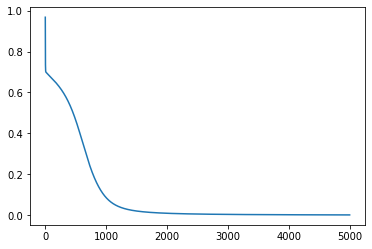

In [11]:
%%time

from sklearn import datasets
iris = datasets.load_iris()
train_x = iris['data']
# train_y = iris['target'].shape
a = iris['target']
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
train_y = b.astype(int)
weights = [4,10,3]


train_x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1]])
train_y = np.array([[0,1],[1,0],[1,0],[0,1]])
weights = [3,10,2]

w_list=[]
for i in range(len(weights)-1):
    w1 = np.random.rand(weights[i],weights[i+1])
    b1 = np.random.rand(1,weights[i+1])
    w_list.append([w1,b1])


lr = np.array(.01)
loss = []
for i in range(100000):
    x=train_x[i%len(train_x)][None,:]
    y=train_y[i%len(train_x)][None,:]
    a_list,h_list,y_hat  = forward_pass(x)
    dw_list = backward_pass(x,a_list,h_list,y,y_hat)
    
    if i%20==0:
        l = (-y*np.log(y_hat)).sum()
        loss.append(l)
        
    
#     dw_list  = lr*dw_list
#         print(w_list[0][1])
#     w_list = [list(map(lambda x, y: x - (lr*y), ii, jj)) for ii, jj in zip(w_list, dw_list)]
    for i in range(len(w_list)):
        w_list[i][0] = w_list[i][0] - lr*dw_list[i][0]
        w_list[i][1] = w_list[i][1] - lr*dw_list[i][1]
        
        
plt.plot(loss)
print('Avg,loss',np.average(loss))


In [8]:
[list(map(lambda x, y: x - y, ii, jj)) for ii, jj in zip(w_list, dw_list)]

[[array([[ 0.29712182,  0.54764827,  0.29982945,  0.51031843,  0.4878247 ,
           0.646439  ,  0.26405995,  0.70055161,  0.41702015,  0.66415303],
         [ 5.9493733 ,  0.75105032,  2.04198399,  0.89469086,  0.52987447,
           1.4108032 ,  0.79483331,  3.05600052,  4.19598094,  0.8589531 ],
         [ 5.80920216,  1.56726024, -0.35069716,  0.43574074,  1.60970589,
           0.83784821,  0.1483932 ,  3.35076838,  4.04553535,  1.20350604]]),
  array([[-2.36241909, -1.48158564,  0.01365067, -0.25162328, -1.20879807,
          -1.43304917,  0.50461338, -4.86411681, -1.36142769, -1.29630268]])],
 [array([[ 6.46066919, -5.8841244 ],
         [-1.38690193,  2.4328276 ],
         [-0.98764548,  2.34802879],
         [-0.6400628 ,  1.7025152 ],
         [-1.20200001,  2.29582611],
         [-1.64630857,  1.98571375],
         [-0.44361129,  1.29669424],
         [-4.04363144,  5.1046421 ],
         [ 4.24779071, -2.65349659],
         [-1.0794194 ,  2.17210901]]),
  array([[0.3447412

In [12]:
i=0
x=train_x
y=train_y
a1_list,h1_list,y_hat =  forward_pass(x)
print(y)
print(np.around(y_hat).astype(int)==y)
print(y_hat)

[[0 1]
 [1 0]
 [1 0]
 [0 1]]
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]
[[0.00195094 0.99804906]
 [0.99364243 0.00635757]
 [0.99360428 0.00639572]
 [0.0093576  0.9906424 ]]


In [13]:
a = iris['target']
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
b.shape

(150, 3)